In [97]:
# Jordan Marshall - 18256716 | Marcin Sek - 18254187
# [Runs without error]
# [Link to original code if used]

          RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[214 rows x 10 columns]


<AxesSubplot:ylabel='Frequency'>

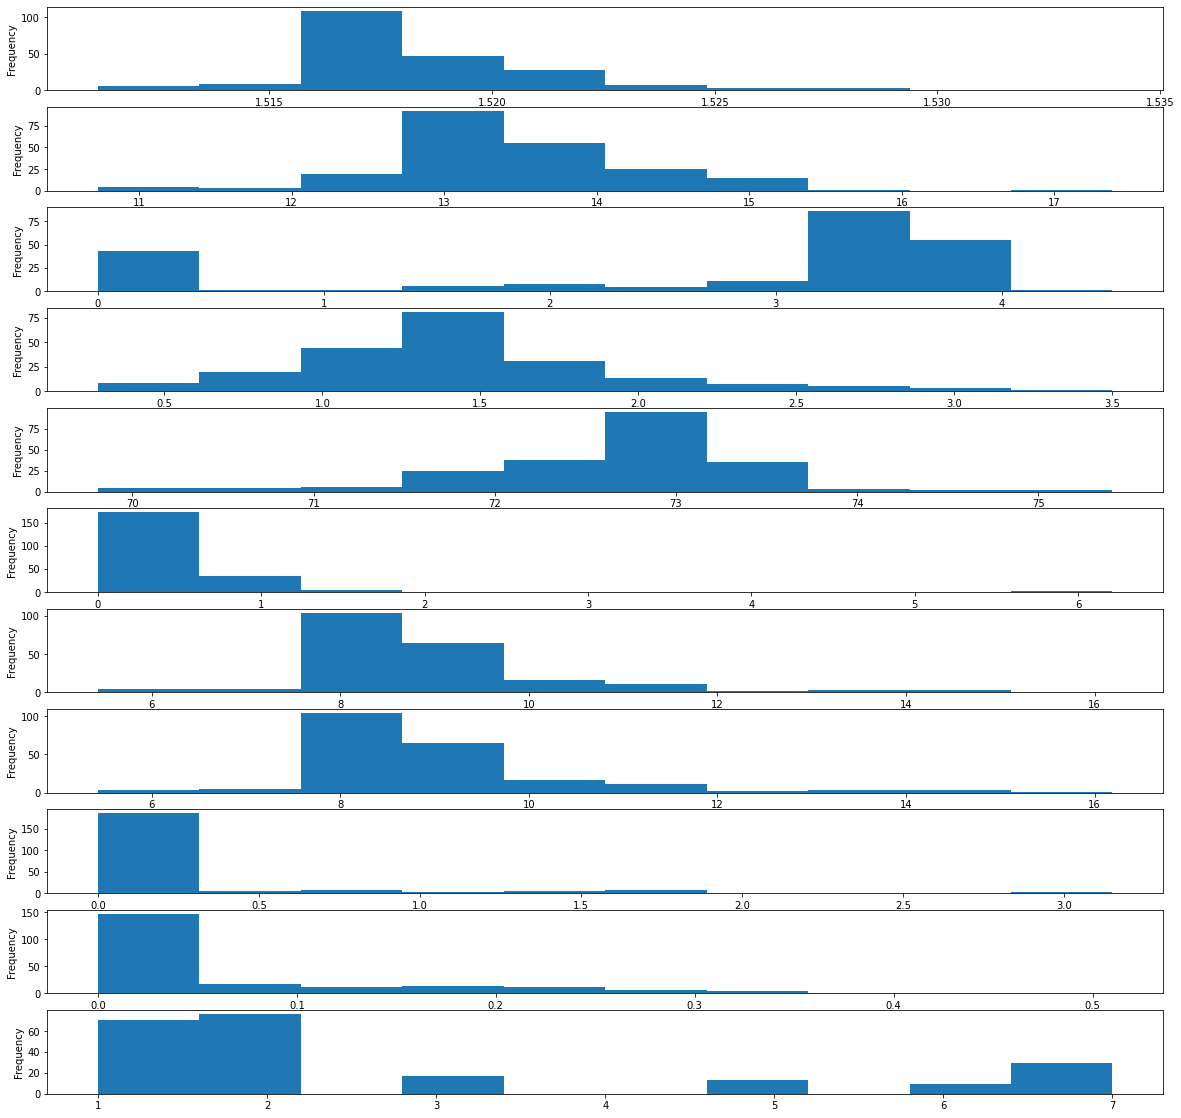

In [98]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

from numpy import argmax
from pandas import read_csv
import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from tensorflow.keras import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.layers import Dropout
# from tensorflow.keras.optimizers import Adam

# load the dataset
path = 'glass.csv'
df = read_csv(path, header=0)

print(df)

fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(20, 20))

df.RI.plot.hist(ax=axes[0,0],)
df.Na.plot.hist(ax=axes[1,0])
df.Mg.plot.hist(ax=axes[2,0])
df.Al.plot.hist(ax=axes[3,0])
df.Si.plot.hist(ax=axes[4,0])
df.K.plot.hist(ax=axes[0,1])
df.Ca.plot.hist(ax=axes[1,1])
df.Ca.plot.hist(ax=axes[2,1])
df.Ba.plot.hist(ax=axes[3,1])
df.Fe.plot.hist(ax=axes[4,1])
df.Type.plot.hist(ax=axes[5,1])

# # split into input and output columns
# X, y = df.values[:, :-1], df.values[:, -1]

# # ensure all data are floating point values
# X = X.astype('float32')

# # encode strings to integer
# y = y.astype('int32')

# # split into train and test datasets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.fit_transform(X_test)

# print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# # determine the number of input features
# n_features = X_train.shape[1]

# # define model
# model = Sequential()
# model.add(Dense(12, activation='elu', kernel_initializer='he_normal', input_shape=(n_features,)))
# model.add(Dropout(0.2))
# model.add(Dense(8, activation='elu', kernel_initializer='he_normal'))
# model.add(Dropout(0.2))
# model.add(Dense(8, activation='softmax'))

# # compile the model
# adam = Adam()
# model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# # fit the model
# history = model.fit(X_train, y_train, validation_split=0.2, epochs=500, batch_size=16, verbose=0)

# # summarize history for accuracy
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

# # summarize history for loss
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

# # evaluate the model
# loss, acc = model.evaluate(X_test, y_test, verbose=0)
# print('Test Accuracy: %.3f' % acc)

# # make a prediction
# row = [1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0,0.26]
# yhat = model.predict([row])
# print('Predicted: %s (class=%d)' % (yhat, argmax(yhat)))
